In [73]:
from os import O_RANDOM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR, SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

frames = [pd.read_csv('https://raw.githubusercontent.com/nalam004/seniordesign/main/cfi_county.csv'), 
          pd.read_csv('https://raw.githubusercontent.com/nalam004/seniordesign/main/unemployment.csv')]
df = pd.concat(frames, axis=1)

LR MAE = 3,012.19
R-squared: -0.025012488844296188
CV mean score:  -0.25707679668023553
MSE:  23.639247231900193
RMSE:  11.819623615950096
C: 0.01
Epsilon: 5
SVR MAE = 3732.35


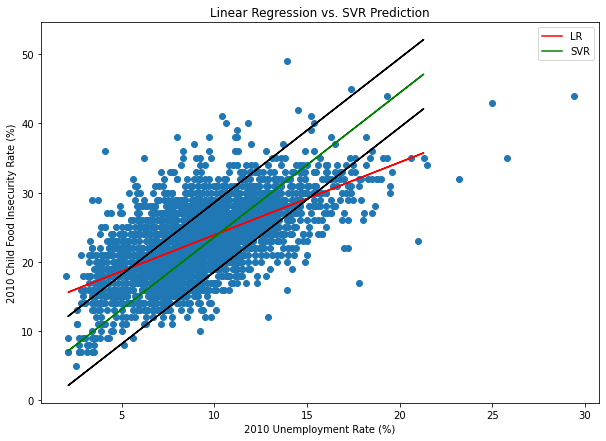

LR MAE = 3,126.77
R-squared: 0.007150051897201637
CV mean score:  -0.20896663298821752
MSE:  24.013409210962603
RMSE:  12.006704605481302
C: 0.01
Epsilon: 5
SVR MAE = 3681.43


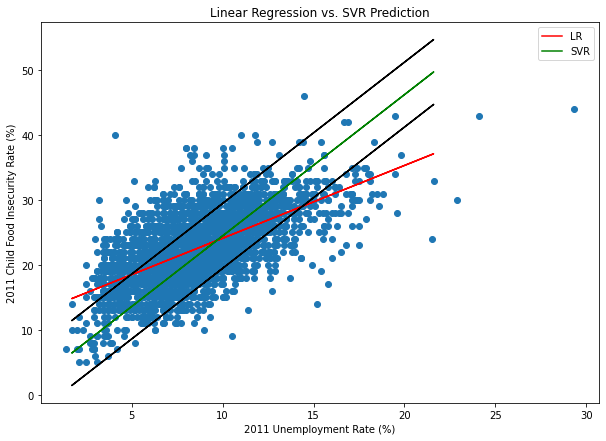

LR MAE = 3,087.08
R-squared: -0.3182391590819742
CV mean score:  -0.6804372777251474
MSE:  27.749717959609868
RMSE:  13.874858979804934
C: 0.01
Epsilon: 5
SVR MAE = 4019.12


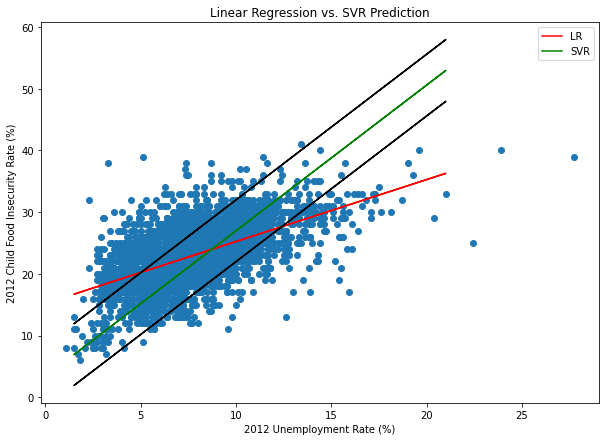

LR MAE = 3,067.18
R-squared: -0.3164635509296292
CV mean score:  -0.748477652084212
MSE:  28.53340045683674
RMSE:  14.26670022841837
C: 0.01
Epsilon: 5
SVR MAE = 4028.82


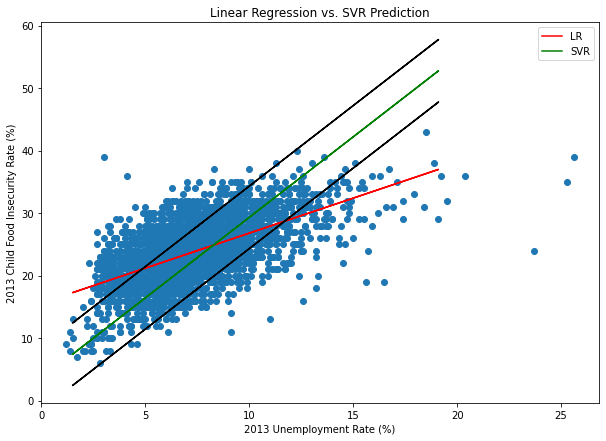

LR MAE = 2,983.84
R-squared: -0.20363702070079648
CV mean score:  -0.5605274819530517
MSE:  28.0148510851924
RMSE:  14.0074255425962
C: 0.01
Epsilon: 5
SVR MAE = 3865.42


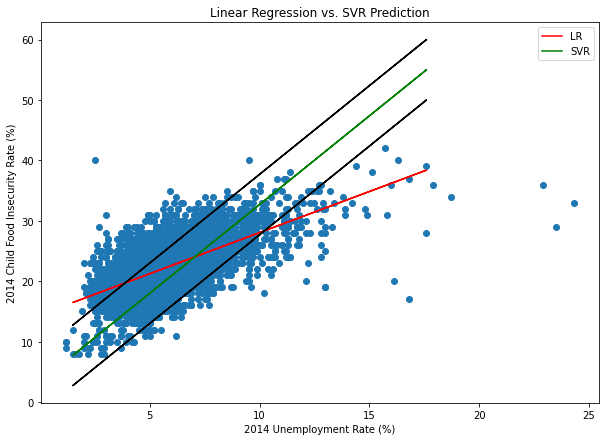

LR MAE = 2,777.14
R-squared: -0.12836864934476666
CV mean score:  -0.4257256097467318
MSE:  22.13810754963569
RMSE:  11.069053774817846
C: 0.01
Epsilon: 5
SVR MAE = 3586.47


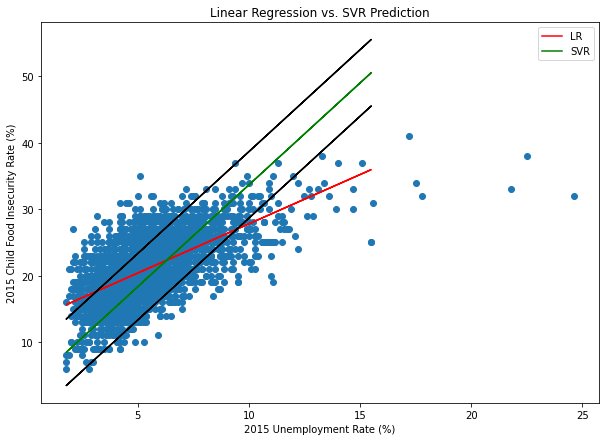

LR MAE = 2,725.96
R-squared: -0.025867051554457454
CV mean score:  -0.27607290886852837
MSE:  20.113788586894845
RMSE:  10.056894293447423
C: 0.01
Epsilon: 5
SVR MAE = 3482.22


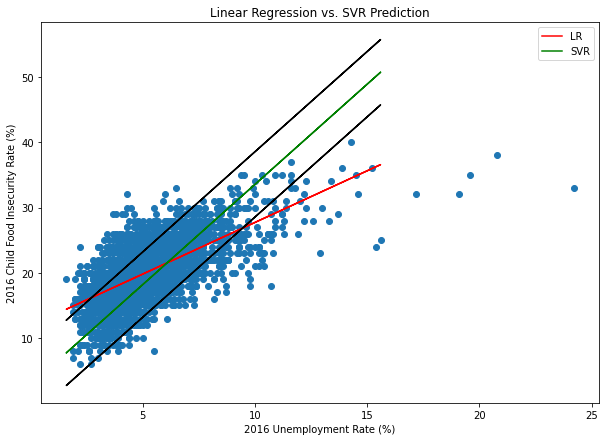

LR MAE = 2,648.67
R-squared: -0.05348153701938152
CV mean score:  -0.2999375150526239
MSE:  19.415796958280172
RMSE:  9.707898479140086
C: 0.01
Epsilon: 5
SVR MAE = 3434.29


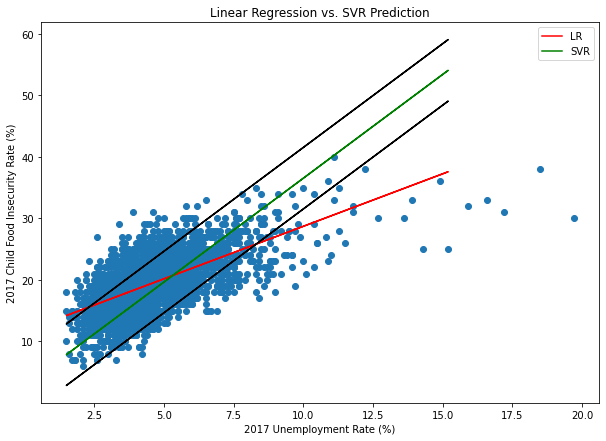

LR MAE = 3,335.47
R-squared: 0.21218646683434228
CV mean score:  0.1266119174008688
MSE:  22.12042322100371
RMSE:  11.060211610501854
C: 0.01
Epsilon: 5
SVR MAE = 3583.01


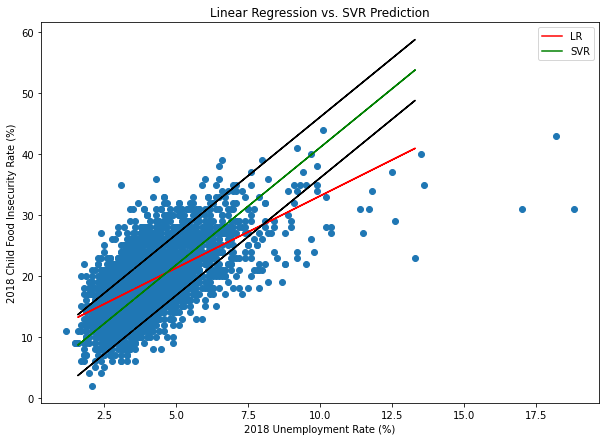

In [74]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

for i in years: 
    x = df[str(i) + ' Unemployment Rate (%)'].astype(float)
    x = x.values.reshape(-1, 1)
    
    y = 100*df[str(i) + ' Child Food Insecurity Rate'].astype(float)
    y = y.values
    
    X = np.array(x).reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=12)
    y_train = y_train.reshape(len(y_train),)
    y_test = y_test.reshape(len(y_test),)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    #print("Intercept: {:,.3f}".format(lm.intercept_))
    #print("Coefficient: {:,.3f}".format(lm.coef_[0]))
    
    mae = mean_absolute_error(y_test, lm.predict(X_test))
    print("LR MAE = {:,.2f}".format(1000*mae))
    
    eps = 5    
    svr = LinearSVR(epsilon=eps, C=0.01, fit_intercept=True)
    svr.fit(X_train, y_train)
    
    score = svr.score(X_train, y_train)
    print("R-squared:", score)
    
    # apply a cross-validation method to the model and check the training accuracy. 
    cv_score = cross_val_score(svr, x, y, cv = 10)
    print("CV mean score: ", cv_score.mean())
    
    # predict the test data by using the trained model. 
    # check the accuracy of predicted data by using MSE and RMSE metrics.
    ypred = svr.predict(X_test)
    
    mse = mean_squared_error(y_test, ypred)
    print("MSE: ", mse)
    print("RMSE: ", mse*(1/2.0))
    
    print("C: {}".format(svr.C))
    print("Epsilon: {}".format(svr.epsilon))
    
    #print("Intercept: {:,.3f}".format(svr.intercept_[0]))
    #print("Coefficient: {:,.3f}".format(svr.coef_[0]))
    
    mae = mean_absolute_error(y_test, svr.predict(X_test))
    print("SVR MAE = {:.2f}".format(1000*mae))
    
    perc_within_eps = 100*np.sum(y_test - svr.predict(X_test) < eps) / len(y_test)
    #print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.scatter(x, y)
    plt.plot(X_test, lm.predict(X_test), color='red', label='LR')
    plt.plot(X_test, svr.predict(X_test), color='green', label='SVR')
    plt.plot(X_test, svr.predict(X_test)+eps, color='black')
    plt.plot(X_test, svr.predict(X_test)-eps, color='black')
    
    plt.xlabel(str(i) + ' Unemployment Rate (%)')
    plt.ylabel(str(i) + ' Child Food Insecurity Rate (%)')
    plt.title('Linear Regression vs. SVR Prediction')
    plt.legend(loc='best')
    plt.show()

LR MAE = 17,509,807,671.81
R-squared: -0.20473239058204395
CV mean score:  -0.4082830583393047
MSE:  821024626578920.9
RMSE:  410512313289460.44
C: 0.01
Epsilon: 5
SVR MAE = 18835683138.68


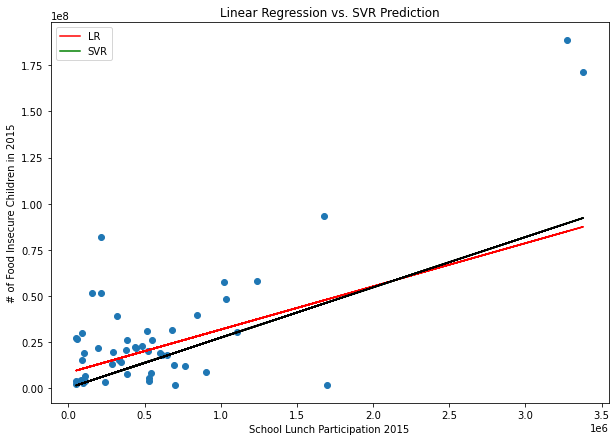

LR MAE = 16,123,343,948.42
R-squared: -0.1925345417402431
CV mean score:  -0.18420843626883526
MSE:  710060568495916.1
RMSE:  355030284247958.06
C: 0.01
Epsilon: 5
SVR MAE = 17420316313.39


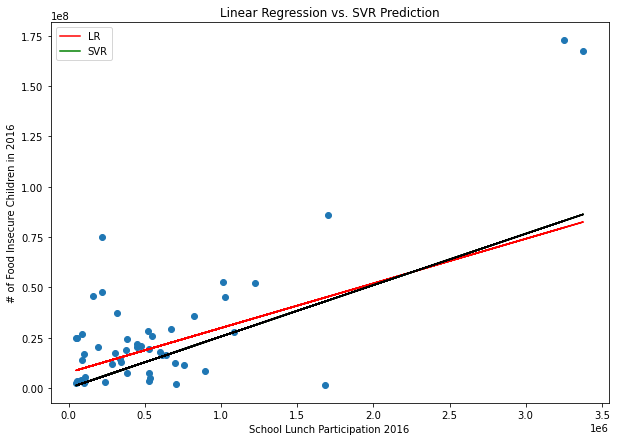

LR MAE = 15,536,927,217.59
R-squared: -0.15908383971238482
CV mean score:  -0.2713839171703474
MSE:  635481750943653.5
RMSE:  317740875471826.75
C: 0.01
Epsilon: 5
SVR MAE = 16594337491.21


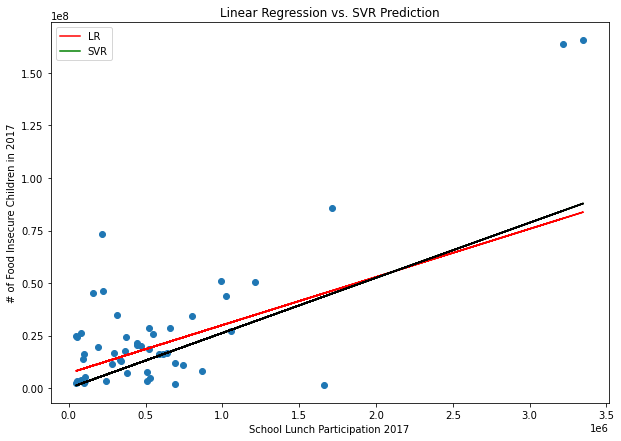

LR MAE = 13,925,002,691.05
R-squared: -0.17603539217772735
CV mean score:  -0.1615603547834739
MSE:  498252298871649.5
RMSE:  249126149435824.75
C: 0.01
Epsilon: 5
SVR MAE = 14818950388.87


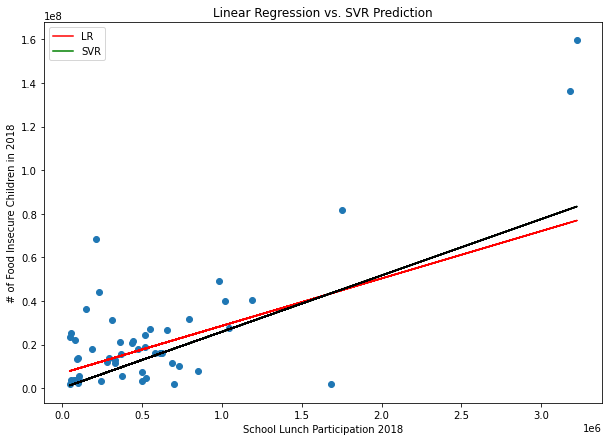

In [81]:
frames = [pd.read_csv('https://raw.githubusercontent.com/nalam004/seniordesign/main/cfi_state.csv'), 
          pd.read_csv('https://raw.githubusercontent.com/nalam004/seniordesign/main/fsp.csv')]
df = pd.concat(frames, axis=1)

years = [2015, 2016, 2017, 2018]

for i in years: 
    x = df['SLP ' + str(i)].astype(float)
    x = x.values.reshape(-1, 1)
    
    y = df['# of Food Insecure Children in ' + str(i)].astype(float)
    y = y.values
    
    X = np.array(x).reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=12)
    y_train = y_train.reshape(len(y_train),)
    y_test = y_test.reshape(len(y_test),)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    #print("Intercept: {:,.3f}".format(lm.intercept_))
    #print("Coefficient: {:,.3f}".format(lm.coef_[0]))
    
    mae = mean_absolute_error(y_test, lm.predict(X_test))
    print("LR MAE = {:,.2f}".format(1000*mae))
    
    eps = 5    
    svr = LinearSVR(epsilon=eps, C=0.01, fit_intercept=True)
    svr.fit(X_train, y_train)
    
    score = svr.score(X_train, y_train)
    print("R-squared:", score)
    
    # apply a cross-validation method to the model and check the training accuracy. 
    cv_score = cross_val_score(svr, x, y, cv = 10)
    print("CV mean score: ", cv_score.mean())
    
    # predict the test data by using the trained model. 
    # check the accuracy of predicted data by using MSE and RMSE metrics.
    ypred = svr.predict(X_test)
    
    mse = mean_squared_error(y_test, ypred)
    print("MSE: ", mse)
    print("RMSE: ", mse*(1/2.0))
    
    print("C: {}".format(svr.C))
    print("Epsilon: {}".format(svr.epsilon))
    
    #print("Intercept: {:,.3f}".format(svr.intercept_[0]))
    #print("Coefficient: {:,.3f}".format(svr.coef_[0]))
    
    mae = mean_absolute_error(y_test, svr.predict(X_test))
    print("SVR MAE = {:.2f}".format(1000*mae))
    
    perc_within_eps = 100*np.sum(y_test - svr.predict(X_test) < eps) / len(y_test)
    #print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.scatter(x, y)
    plt.plot(X_test, lm.predict(X_test), color='red', label='LR')
    plt.plot(X_test, svr.predict(X_test), color='green', label='SVR')
    plt.plot(X_test, svr.predict(X_test)+eps, color='black')
    plt.plot(X_test, svr.predict(X_test)-eps, color='black')
    
    plt.xlabel('School Lunch Participation ' + str(i))
    plt.ylabel('# of Food Insecure Children in ' + str(i))
    plt.title('Linear Regression vs. SVR Prediction')
    plt.legend(loc='best')
    plt.show()